Import of libraries and data. 
The column "state" is added.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
restaurants = pd.read_csv('restaurants.csv')
menu = pd.read_csv('restaurant-menus.csv')
merged = restaurants.merge(menu, how='left', left_on='id', right_on='restaurant_id' , sort=False, suffixes=('_rest', '_menu'))
restaurants['state'] = [str(a).replace(str(b), '').strip()[-3:-1] for a, b in zip(restaurants['full_address'], restaurants['zip_code'])]
restaurants.loc[restaurants['zip_code'].str.len() == 2, ['zip_code']] = '00000'
restaurants.loc[restaurants['zip_code'].isin(['75070']), ['state']] = 'TX'
restaurants.loc[restaurants['state'].isin([', ','an','U']),['state']] = 'PR'




Import of geolocalisation module. A function that determines correct state based on longitude and latitude.

In [4]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
def state_func(row):
    coord = f"{row['lat']}, {row['lng']}"
    location = geolocator.reverse(coord, exactly_one=True)    
    address = location.raw['address']
    state = address.get('state','')
    row['state'] = state
    return row

Applying the function on the dataframe copy. Dataframe update. 


In [5]:
restaurants1 = restaurants[restaurants['state']==''].apply(state_func, axis=1)
restaurants.update(restaurants1)

Newly added states were in full forms, that's why all abbreviations have been changed to full names in order to unify the table.

In [6]:
restaurants.loc[restaurants['state']=='AL', 'state']='Alabama'
restaurants.loc[restaurants['state']=='WY', 'state']='Wyoming'
restaurants.loc[restaurants['state']=='WI', 'state']='Wisconsin'
restaurants.loc[restaurants['state']=='MN', 'state']='Minnesota'
restaurants.loc[restaurants['state']=='IL', 'state']='Illinois'
restaurants.loc[restaurants['state']=='WV', 'state']='West Virginia'
restaurants.loc[restaurants['state']=='OH', 'state']='Ohio'
restaurants.loc[restaurants['state']=='WA', 'state']='Washington'
restaurants.loc[restaurants['state']=='OR', 'state']='Oregon'
restaurants.loc[restaurants['state']=='PR', 'state']='Puerto Rico'
restaurants.loc[restaurants['state']=='ID', 'state']='Idaho'
restaurants.loc[restaurants['state']=='VA', 'state']='Virginia'
restaurants.loc[restaurants['state']=='DC', 'state']='District of Columbia'
restaurants.loc[restaurants['state']=='MD', 'state']='Maryland'
restaurants.loc[restaurants['state']=='TN', 'state']='Tennessee'
restaurants.loc[restaurants['state']=='VT', 'state']='Vermont'
restaurants.loc[restaurants['state']=='UT', 'state']='Utah'
restaurants.loc[restaurants['state']=='TX', 'state']='Texas'
restaurants.loc[restaurants['state']=='AM', 'state']='Puerto Rico'

There were still some records without "state". A Google investigation showed that they were all restaurants from Texas.

In [7]:
restaurants.loc[restaurants['state']=='', 'state']='Texas'

In [8]:
restaurants['state'].unique()

array(['Alabama', 'Wyoming', 'Wisconsin', 'Minnesota', 'Illinois',
       'West Virginia', 'Ohio', 'Washington', 'Oregon', 'Puerto Rico',
       'Idaho', 'Virginia', 'District of Columbia', 'Maryland',
       'Tennessee', 'Vermont', 'Utah', 'Texas'], dtype=object)

In [9]:
#NaN removal
veg = restaurants[restaurants['category'].notna()]

Restaurants with vegan and vegetarian options

In [10]:
vege = veg[veg['category'].str.contains('Veg')]
vege

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,state
7,8.0,26.0,Little India,NaN,NaN,"Vegetarian, Asian, Asian Fusion, Chinese, Indi...",$,"2236 Highland Ave, Birmingham, AL, 35205",35205,33.502259,-86.790298,Alabama
9,10.0,51.0,Cajun Bistro Express,NaN,NaN,"Desserts, Vegetarian, Coffee and Tea",$,"1515 Pearson Ave SW, Birmingham, AL, 35211",35211,33.486840,-86.856300,Alabama
14,15.0,139.0,The Imperial Indian,NaN,NaN,"Indian, Vegetarian, Pakistani, Chicken, Indian...",NaN,"1024 20th Street South Unit 101, Birmingham, A...",35205,33.500900,-86.796900,Alabama
18,19.0,30.0,Falafel Cafe,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",$,"401 19th St S, Birmingham, AL, 35233",35233,33.508353,-86.803170,Alabama
37,38.0,61.0,CHOP N FRESH,4.8,39.0,"Salads, Vegetarian, Bowls",$,"291 Rele Street, Mountain Brook, AL, 35223",35223,33.486040,-86.773660,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...
40217,40218.0,61.0,Anthem,4.6,43.0,"American, Salads, Vegetarian, Healthy, Vegan, ...",$$,"91 Rainey Street ,STE 120, Austin, TX, 78701",78701,30.260303,-97.737669,Texas
40219,40220.0,59.0,Le Bleu (Research Blvd),4.9,175.0,"Vietnamese, Noodles, Healthy, Family Friendly,...",$,"9070 Research blvd #303, Austin, TX, 78757",78757,30.372124,-97.727290,Texas
40221,40222.0,57.0,Clay Pit (Guadalupe St),4.7,408.0,"Comfort Food, Indian, Family Meals, Vegan, Veg...",$,"1601 Guadalupe St, Austin, TX, 78701",78701,30.279008,-97.742405,Texas
40223,40224.0,53.0,Wholly Cow Burgers (S Lamar),4.6,245.0,"American, Burgers, Breakfast and Brunch, Aller...",$,"3010 S Lamar Blvd, Austin, TX, 78704",78704,30.242816,-97.783821,Texas


There are 3043 such restaurants.

In [11]:
vege.count()

id              3043
position        3043
name            3043
score           1789
ratings         1789
category        3043
price_range     2185
full_address    3026
zip_code        3026
lat             3043
lng             3043
state           3043
dtype: int64

In [12]:
vege['state'].unique()

array(['Alabama', 'Wyoming', 'Wisconsin', 'Illinois', 'West Virginia',
       'Washington', 'Oregon', 'Idaho', 'Virginia',
       'District of Columbia', 'Maryland', 'Tennessee', 'Vermont', 'Utah',
       'Puerto Rico', 'Texas'], dtype=object)

The sum of restaurants with dishes from "vege" category in individual states.


In [13]:
vegsum = pd.pivot_table(vege, index='state', values='id', aggfunc=len)
vegsum = vegsum.rename(columns={'id': 'Total restaurants with veg'})
vegsum.reset_index(inplace=True)
vegsum

,state,Total restaurants with veg
0,Alabama,69
1,District of Columbia,183
2,Idaho,1
3,Illinois,9
4,Maryland,111
5,Oregon,121
6,Puerto Rico,11
7,Tennessee,1
8,Texas,558
9,Utah,219


How many restaurants are there in different states anyway?


In [14]:
totalres = pd.pivot_table(restaurants, index='state', values='id', aggfunc=len)
totalres = totalres.rename(columns={'id': 'Total restaurants'})
totalres


,Total restaurants
state,
Alabama,1114
District of Columbia,1517
Idaho,27
Illinois,204
Maryland,897
Minnesota,43
Ohio,15
Oregon,1031
Puerto Rico,220


How many restaurants are there with "vege" options in specific states percentage-wise?

In [15]:
sumresveg = totalres.merge(vegsum, how='outer', on = 'state')
sumresveg = sumresveg.fillna(0)
sumresveg
sumresveg['veg restaurants %'] = sumresveg['Total restaurants with veg'] / sumresveg['Total restaurants'] * 100
sumresveg = sumresveg.round(2)
#sumresveg.reset_index(inplace=True)
sumresveg

,state,Total restaurants,Total restaurants with veg,veg restaurants %
0,Alabama,1114,69.0,6.19
1,District of Columbia,1517,183.0,12.06
2,Idaho,27,1.0,3.70
3,Illinois,204,9.0,4.41
4,Maryland,897,111.0,12.37
5,Minnesota,43,0.0,0.00
6,Ohio,15,0.0,0.00
7,Oregon,1031,121.0,11.74
8,Puerto Rico,220,11.0,5.00
9,Tennessee,42,1.0,2.38


Preparation of data for the plot.

In [16]:
vegtoplot = sumresveg[['state','Total restaurants', 'Total restaurants with veg']]

Total restaurants vs total restaurants with "vege" options

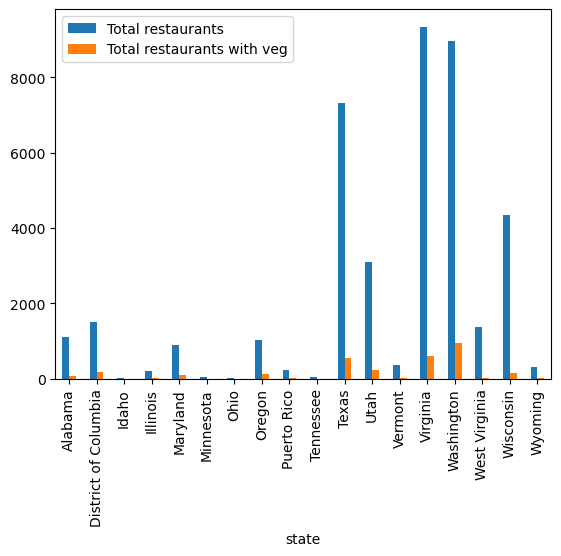

In [17]:
vegtoplot.plot(x="state", kind = 'bar', mark_right=True);

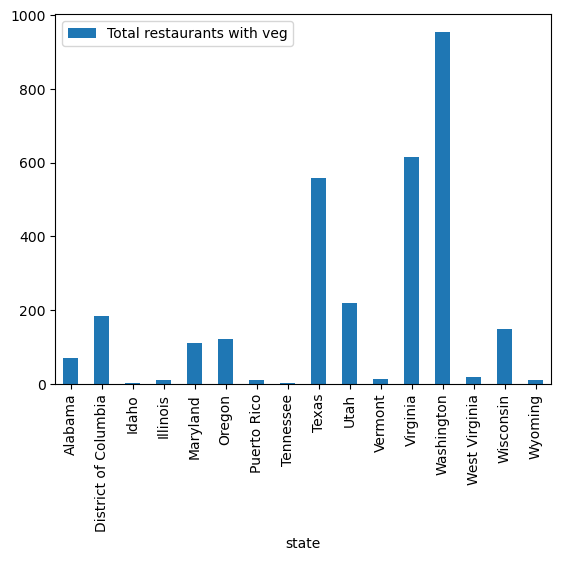

In [18]:
vegsum.plot(kind='bar', x='state', y='Total restaurants with veg')
plt.show()

Are restaurants with "vege" options cheap? How does it look like percentage-wise?

In [19]:
vege = vege.replace(to_replace="$$$$", value="$$$")
vegpr = vege.value_counts('price_range').rename_axis('price_range').to_frame('total')
vegpr = vegpr.reset_index()
vegpr['sum'] = vegpr['total'].sum()
vegpr['%'] = vegpr['total'] / vegpr['sum']*100
vegpr = vegpr.round(2)
vegpr

,price_range,total,sum,%
0,$,1571,2185,71.90
1,$$,604,2185,27.64
2,$$$,10,2185,0.46


For an investor wanting to open a sustainable restaurant with healthy dishes in the USA, it would be really worth it to consider states, where there are many restaurants with "vege" options. It is widely known that plant food is both good for the environment and for our bodies. That's why such a restaurant MUST include vegetarian and vegan options.    

States with a considerable number of restaurants with plant-based options (over 10% of restaurants, states with at least 1000 records) are: District of Columbia (Washington DC, 12.06%), Oregon (11.74%), Washington (10.65%).    

When in comes to prices, so there is a significant predominance of cheap restaurants. This is mostly caused by the fact that our data comprise of data from Uber eats, and people are in general not so eager to order takeaway from expensive restaurants.    

It is worth noticing that when we compare prices in restaurants with vege options to the overall, the proportion of moderate restaurants to cheap restaurants is a little higher.